# Homework w04d03


Import Python Libraries


In [2]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cross_validation import train_test_split, cross_val_predict, cross_val_score
from sklearn.metrics import accuracy_score, average_precision_score, f1_score, recall_score
from matplotlib import pyplot as plt
%matplotlib inline
#import seaborn as sns


### Read in the Wisconsin Breast Cancer Dataset

### Assign the columns

The attributes below will be the columns of the dataset.
  
Attribute                     

1. Sample code number [subject ID]
1. Class
1. Cell nucleus mean radius
1. Cell nucleus SE radius
1. Cell nucleus worst radius
1. Texture mean
1. Texture SE
1. Texture worst
1. Perimeter mean
1. Perimeter SE
1. Perimeter worst
1. Area mean
1. Area SE
1. Area worst
1. Smoothness mean
1. Smoothness SE
1. Smoothness worst
1. Compactness mean
1. Compactness SE
1. Compactness worst
1. Concavity mean
1. Concavity SE
1. Concavity worst
1. Concave points mean
1. Concave points SE
1. Concave points worst
1. Symmetry mean
1. Symmetry SE
1. Symmetry worst
1. Fractal dimension mean
1. Fractal dimension SE
1. Fractal dimension worst
1. The column names are taken from the dataset info file.

For more information check out the information file: wdbc.txt.

In [3]:
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data", header=None)

In [4]:
column_names = ['id','malignant',
                'nucleus_mean','nucleus_se','nucleus_worst',
                'texture_mean','texture_se','texture_worst',
                'perimeter_mean','perimeter_se','perimeter_worst',
                'area_mean','area_se','area_worst',
                'smoothness_mean','smoothness_se','smoothness_worst',
                'compactness_mean','compactness_se','compactness_worst',
                'concavity_mean','concavity_se','concavity_worst',
                'concave_pts_mean','concave_pts_se','concave_pts_worst',
                'symmetry_mean','symmetry_se','symmetry_worst',
                'fractal_dim_mean','fractal_dim_se','fractal_dim_worst']


df.columns = column_names

### Split the dataset into target (malign) and data features (everything except id and malignant)

In [5]:
y = df['malignant']
X = df.ix[:,2:] 

### Recode the target variable with 1 for M (malign) and 0 for B (benign)

In [6]:
convert = {'M':1,'B':0}
y = [convert[output] for output in y]

### How many cases of malign carcinoms are in the dataset?

In [7]:
sum([val==1 for val in y])

212

### Set kNN's k value to 3 and fit the data

In [8]:
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X,y)
predictions = neigh.predict(X)

### Find the model accuracy (score)

In [9]:
res = []
for i in range(len(y)):
    res.append(predictions[i] == y[i])

from sklearn.metrics import confusion_matrix
conmat = np.array(confusion_matrix(y, predictions))
confusion = pd.DataFrame(conmat, index=['is_benign', 'is_malignant'],columns=['predicted_benign', 'predicted_malignant'])
confusion

,predicted_benign,predicted_malignant
is_benign,351,6
is_malignant,19,193


In [10]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y, predictions)
print(acc)

0.956063268893


### Split into training and test data and calculate the test score for k in the range from 1 to 100

Optimal accuracy is 0.976608 obtained for k = 11


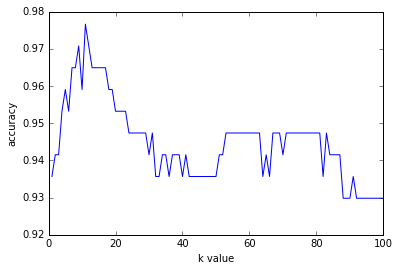

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
res = []
for i in range(1,101):
    neigh = KNeighborsClassifier(n_neighbors=i)
    neigh.fit(X_train,y_train)
    predictions = neigh.predict(X_test)
    acc = accuracy_score(y_test, predictions)
    res.append(acc)
max = np.max(res)
ind = res.index(max) + 1
print("Optimal accuracy is %f obtained for k = %d" % (max,ind))

plt.plot(range(1,101),res)
plt.xlabel("k value")
plt.ylabel("accuracy")
plt.show()

### Perform 5-fold cross validation for k in the range from 1 to 100. Which k performs best? Plot the mean accuracy from the cross validation versus k.

In [12]:
# use cross_val_predict(model,X,y, cv=5) and cross_val_predict(model,X,y, cv=5)
res = []
for i in range(1,101):
    neighb = KNeighborsClassifier(n_neighbors=i)
    predictions = cross_val_predict(neighb,X,y,cv=5)
    acc = accuracy_score(y, predictions)
    res.append(acc)

In [13]:
# Best k
max = np.max(res)
ind = res.index(max) + 1
print("Optimal accuracy is %f obtained for k = %d" % (max,ind))

Optimal accuracy is 0.934974 obtained for k = 14


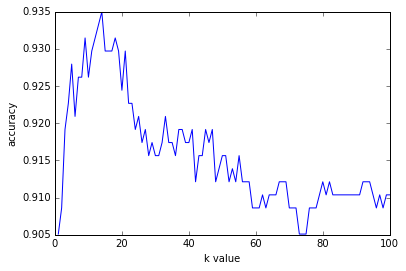

In [110]:
# plot mean accuracy versus k
plt.plot(range(1,101),res)
plt.xlabel("k value")
plt.ylabel("accuracy")
plt.show()

### Bonus: plot other scores like F1, recall and precision obtained in cross validation versus k

In [14]:
from __future__ import division

res_f1 = []
res_precision = []
res_recall = []
for i in range(1,101):
    neighb = KNeighborsClassifier(n_neighbors=i)
    predictions = cross_val_predict(neighb,X,y,cv=5)
    conmat = np.array(confusion_matrix(y, predictions))
    tn, fp, fn, tp = conmat.ravel()
    precision = tp/(tp+fp)
    recall = tp/(tp+fn)
    f1 = 2*(precision*recall)/(precision+recall)
    res_precision.append(precision)
    res_recall.append(recall)
    res_f1.append(f1)

In [16]:
# Best k
max = np.max(res_f1)
ind = res_f1.index(max) +1
print("Optimal f1 is %f obtained for k = %d" % (max,ind))

Optimal f1 is 0.908642 obtained for k = 14


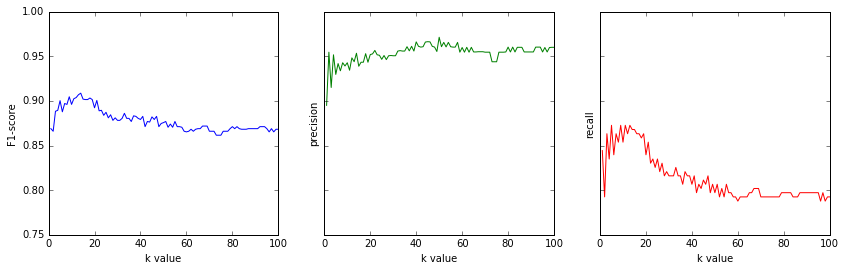

In [18]:
# plot mean accuracy versus k
f, axes = plt.subplots(1,3,sharey=True,figsize=(14, 4))

axes[0].plot(range(1,101),res_f1)
axes[0].set_xlabel("k value")
axes[0].set_ylabel("F1-score")

axes[1].plot(range(1,101),res_precision,color="green")
axes[1].set_xlabel("k value")
axes[1].set_ylabel("precision")

axes[2].plot(range(1,101),res_recall,color="red")
axes[2].set_xlabel("k value")
axes[2].set_ylabel("recall")
plt.show()